In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
#Generamos los puntos aleatorios
num_puntos = 100
puntos = np.random.uniform(low=-20, high=20, size=(num_puntos, 2))

In [3]:
#Codificar los cuadrantes como vectores
cuadrantes = np.zeros((num_puntos, 4))
for i, punto in enumerate(puntos):
    if punto[0] >= 0 and punto[1] >= 0:
        cuadrantes[i] = [1, 0, 0, 0]
    elif punto[0] < 0 and punto[1] >= 0:
        cuadrantes[i] = [0, 1, 0, 0]
    elif punto[0] < 0 and punto[1] < 0:
        cuadrantes[i] = [0, 0, 1, 0]
    else:
        cuadrantes[i] = [0, 0, 0, 1]

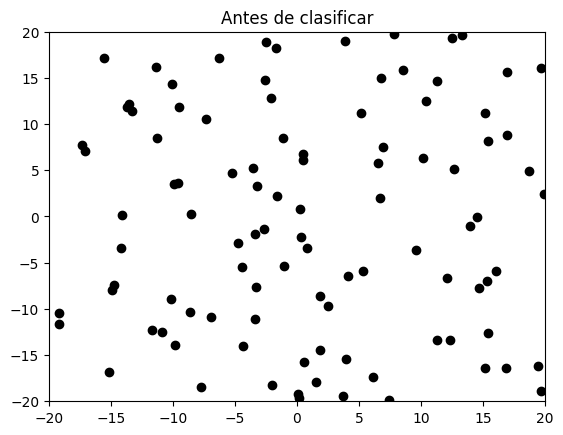

In [4]:
#Graficar los puntos antes de la clasificación
x = puntos[:, 0]
y = puntos[:, 1]
plt.scatter(x, y, color='black')
plt.xlim(-20, 20)
plt.ylim(-20, 20)
plt.title('Antes de clasificar')
plt.show()

In [ ]:
#Red neuronal
#Usamos 4 neuronas de salida, una para cada cuadrante
ann = tf.keras.models.Sequential()
ann.add(tf.keras.layers.Dense(8, input_shape=(2,), activation='relu'))
ann.add(tf.keras.layers.Dense(4, activation='relu'))
ann.add(tf.keras.layers.Dense(4, activation='softmax'))

In [ ]:
#Compilamos la red
ann.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

#Entrenamos la red con 1000 epocas
ann.fit(puntos, cuadrantes, epochs=1000)

#Predecimos los cuadrantes de los puntos generados
predicciones = ann.predict(puntos)

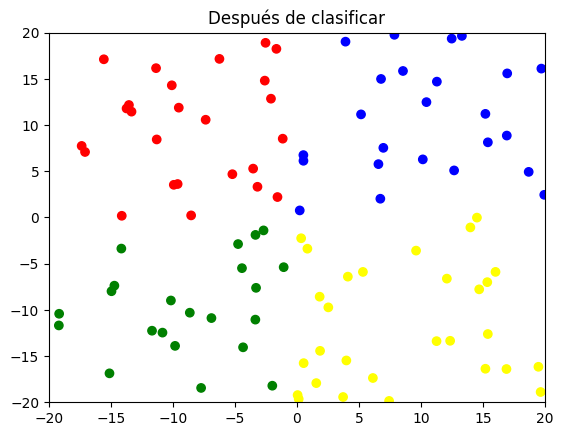

In [7]:
#Clasificamos los puntos en la gráfica
x = puntos[:, 0]
y = puntos[:, 1]
clases = np.argmax(predicciones, axis=1) + 1
colores = np.array(['blue', 'red', 'green', 'yellow'])[clases - 1]

#Se grafica en el plano
plt.scatter(x, y, c=colores)
plt.xlim(-20, 20)
plt.ylim(-20, 20)
plt.title('Después de clasificar')
plt.show()

In [9]:
#Creamos nuevos puntos para ver si los clasifica bien
#Y si la red aprendió
num_n_puntos = 5  #Num de puntos aleatorios
n_puntos = np.random.uniform(low=-20, high=20, size=(num_n_puntos, 2))
n_prediccion = ann.predict(n_puntos)
n_clases = np.argmax(n_prediccion, axis=1) + 1

#Mostrar la clasificación de los nuevos puntos
for i, punto in enumerate(n_puntos):
    cuadrante = n_clases[i]
    print(f"El punto {punto} hace parte del cuadrante {cuadrante}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
El punto [ -7.924166   -11.96459413] hace parte del cuadrante 3
El punto [ -5.24538433 -11.84869725] hace parte del cuadrante 3
El punto [ 8.59648811 -2.56316341] hace parte del cuadrante 4
El punto [-17.26660285  14.35245987] hace parte del cuadrante 2
El punto [10.14374584  7.75415961] hace parte del cuadrante 1
